
# Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [29]:
import numpy as np
import pandas as pd
import math as ma

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('adspend.googletrends.weekly.csv', parse_dates=['FIXED TIME'])

<IPython.core.display.Javascript object>

In [3]:
df.head()

,FIXED TIME,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue,TOTALdiff,valuediff
0,2013-10-07,1214.4,0.0,58.3,0.0,1635.2,1465.2,238.2,0.0,354.6,171.9,5137.6,3.0,13562.444781,-137.153207,NaN,NaN
1,2013-10-14,1119.7,0.0,58.3,0.0,1635.2,1753.1,0.0,0.0,123.0,91.1,4780.4,10.0,13653.231185,96.334154,-357.2,90.786404
2,2013-10-21,2110.3,0.0,58.3,0.0,1635.2,3304.3,0.0,0.0,282.8,164.9,7555.8,17.0,13789.057289,30.682651,2775.4,135.826104
3,2013-10-28,2163.0,2216.8,91.0,0.0,1500.4,4027.4,36.4,99.0,342.6,149.3,10625.9,24.0,13921.063754,-122.811537,3070.1,132.006465
4,2013-11-04,1281.1,0.0,134.7,0.0,1320.7,3044.9,348.0,0.0,850.4,40.7,7020.5,31.0,14834.815243,-246.624368,-3605.4,913.751489


In [4]:
df.tail()

,FIXED TIME,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue,TOTALdiff,valuediff
256,2018-09-03,2258.1,0.0,57.1,0.0,1004.9,1676.5,0.3,0.0,59.1,4.2,5060.2,1795.0,18998.279498,1581.136757,45.2,-246.137660
257,2018-09-10,1635.0,0.0,57.1,0.0,1004.9,2217.4,0.3,0.0,2.4,4.2,4921.2,1802.0,16820.491532,71.748873,-139.0,-2177.787965
258,2018-09-17,1628.4,0.0,57.1,0.0,1004.9,1581.6,0.3,0.0,2.9,4.2,4279.3,1809.0,16525.660300,74.761398,-641.9,-294.831232
259,2018-09-24,423.1,0.0,57.1,0.0,1004.9,1814.8,0.3,0.0,1.7,4.2,3306.0,1816.0,16134.278519,55.014185,-973.3,-391.381781
260,2018-10-01,2419.4,2317.4,106.2,0.0,703.4,1498.7,96.0,37.2,37.2,4.2,7219.7,1820.0,15348.962257,NaN,3913.7,-785.316263


In [33]:
df['logdiff'] = np.log(abs(df['valuediff']))

<AxesSubplot:>

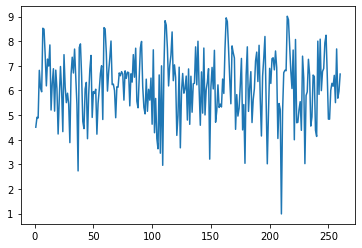

In [36]:
df['logdiff'].plot()

In [59]:
df = df.fillna(0)

In [6]:
df.describe()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue,TOTALdiff,valuediff
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,260.000000,260.000000,260.000000
mean,1601.499617,364.646360,149.360920,1.154406,1077.929885,1152.883142,117.175479,5.916858,80.408046,35.345977,4586.307280,912.988506,17207.087030,-1.292201,8.008077,6.871221
std,867.846221,816.267914,198.471895,6.245610,437.320002,1207.092950,186.465481,22.606609,98.129651,60.701706,2396.116935,528.399030,2532.333028,522.662115,2137.307839,1673.650909
min,0.000000,0.000000,0.900000,0.000000,271.200000,0.000000,0.000000,0.000000,0.000000,0.000000,520.100000,3.000000,12919.394853,-1959.409963,-6026.400000,-7130.918618
25%,979.100000,0.000000,15.000000,0.000000,771.100000,1.800000,0.000000,0.000000,22.400000,10.500000,2763.700000,458.000000,15259.463033,-140.610232,-982.275000,-419.436158
50%,1539.500000,0.000000,69.400000,0.000000,988.100000,940.300000,6.100000,0.000000,49.600000,14.400000,4279.300000,913.000000,16983.601901,-12.255090,-26.200000,80.704868
75%,2196.400000,0.000000,167.600000,0.000000,1472.700000,1844.900000,201.000000,0.000000,104.100000,21.300000,6245.500000,1368.000000,18804.605044,106.361430,997.275000,678.557323
max,4226.600000,4440.900000,848.400000,61.300000,2485.600000,6558.000000,962.900000,226.300000,850.400000,418.300000,12695.600000,1820.000000,27007.440930,2053.225312,7073.700000,8209.339362


In [183]:
df['TOTALdiff'].shape

(261,)

## Step 2: Visualize the Data

<AxesSubplot:>

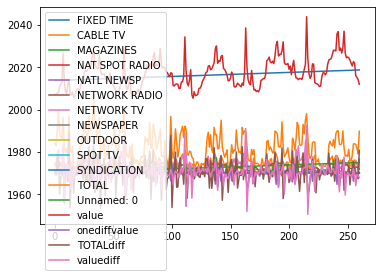

In [7]:
df.plot()

In [8]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [10]:
test_result=adfuller(df['value'])

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [13]:
adfuller_test(df['value'])

ADF Test Statistic : -3.987197677185205
p-value : 0.001479051684901936
#Lags Used : 10
Number of Observations Used : 250
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [81]:
## Again test dickey fuller test
adfuller_test(df['valuediff'].dropna())

ADF Test Statistic : -7.888235748908656
p-value : 4.508973524854598e-12
#Lags Used : 4
Number of Observations Used : 256
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

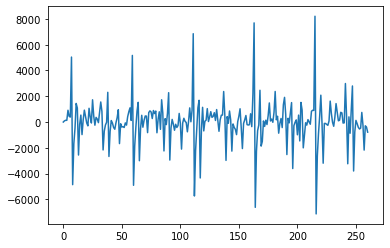

In [97]:
df['valuediff'].plot()

## Auto Regressive Model
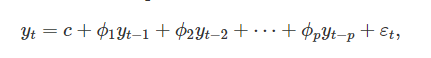

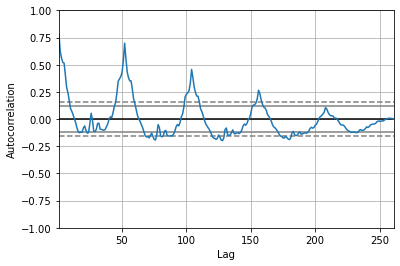

In [96]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['value'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

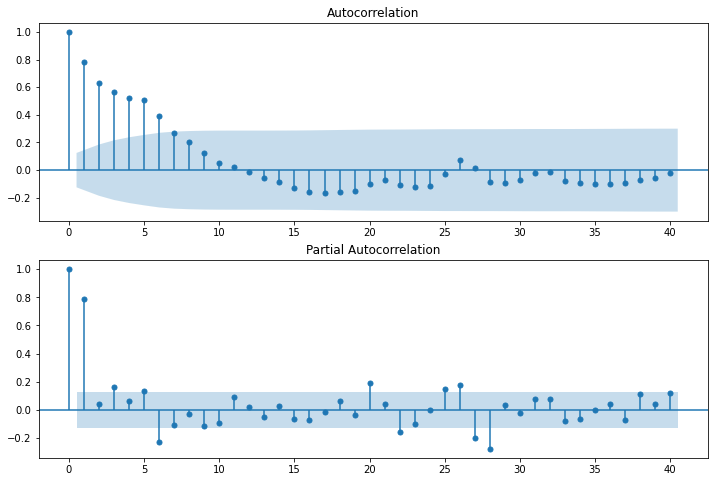

In [184]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['value'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['value'].iloc[13:],lags=40,ax=ax2)

In [150]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [151]:
df['valuediff']


0         0.000000
1        90.786404
2       135.826104
3       132.006465
4       913.751489
          ...     
256    -246.137660
257   -2177.787965
258    -294.831232
259    -391.381781
260    -785.316263
Name: valuediff, Length: 261, dtype: float64

In [105]:
import statsmodels.api as sm

In [187]:
model=sm.tsa.statespace.SARIMAX(df['value'][:200],order=(1, 1, 6),seasonal_order=(1,1,6,52))
results=model.fit()

C:\Users\somes\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\somes\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

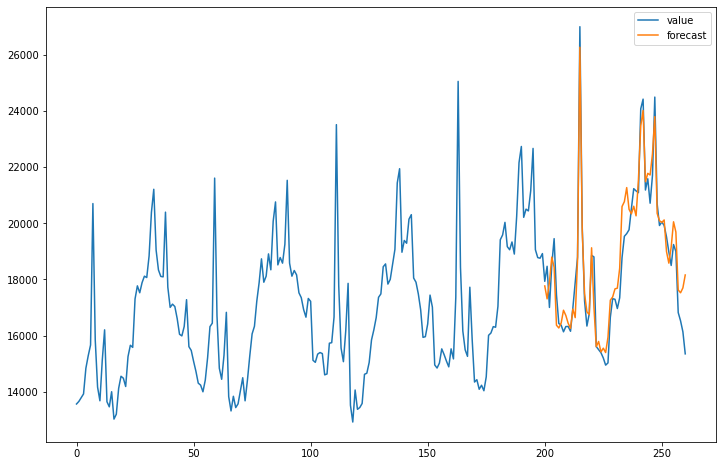

In [186]:
df['forecast']=results.predict(start = 200 , end =260)
df[['value','forecast']].plot(figsize=(12,8))

In [188]:
model1=sm.tsa.statespace.SARIMAX(df['value'][:200], exog = df['TOTAL'][:200], order=(1, 1, 2),seasonal_order=(1,1,2,52))
results1=model1.fit()

<AxesSubplot:>

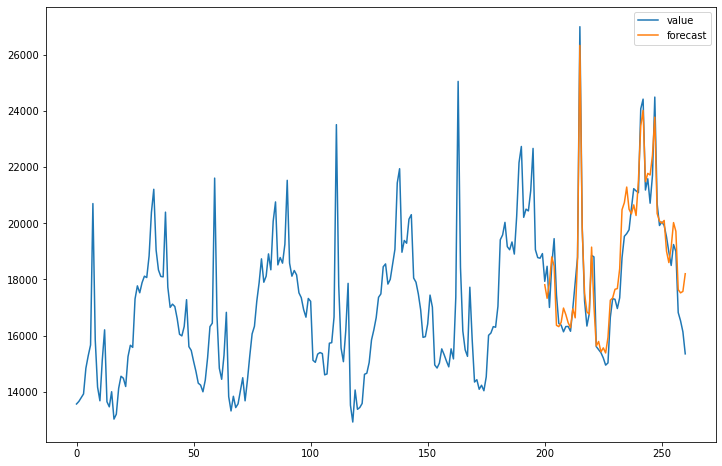

In [189]:
df['forecast']=results1.predict(exog = df['TOTAL'][200:],start = 200 , end = 260)
df[['value','forecast']].plot(figsize=(12,8))